<center>
    <h3>UTSPAN 2019-2020 Tutorial 1</h3>
    <h3>Source: MIE465 Analytics in Action</h3>
    <hr>
    <h1>Linear Regression</h1>
</center>


# Introduction
Linear regression is one of the simplest and most widely used prediction methods. It is used to model the relationship between a dependent variable, called the \emph{target variable} and one or more independent variables, called the \emph{feature variables}. For a given data point, let $y$ represent the target variable and $x_1,x_2,\dots,x_K$ represent $K$ feature variables. Our goal is to determine the best values for the regression coefficients, $\beta_0,\beta_1,\dots,\beta_K$, such that our predicted target values,

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_Kx_K,$$

are as close as possible to the true target values, $y$. 

We define the error (i.e., residual) for a given observation to be $(\hat{y} -y)$. Then we choose our regression coefficients to minimize the mean squared error (MSE) between the true target values and the predicted target values across all data points. For example, suppose we observe $n$ data points of the form $(y_i,x_{i1},x_{i2},\dots,x_{iK}), \;i=1,\dots,n$. We can minimize the mean squared error (MSE) as follows:

$$
\begin{aligned}
\min_{\beta_0,\beta_1,\dots,\beta_K} \quad  & \frac{1}{n}\sum_{i=1}^n \left( \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \dots + \beta_Kx_{iK} - y_i \right)^2.     \quad\quad\quad (1)
\end{aligned}
$$

We denote the regression coefficients that minimize (1) by $\hat{\beta}_0,\hat{\beta}_1,\dots,\hat{\beta}_K$. 

The application of linear regression typically falls into one of two categories based on the end goal:

 1. __Prediction accuracy:__ predict the target value for future feature variables. As a result, we want to obtain the best prediction accuracy and fewer assumptions can be made at the cost of regression coefficient interpretation.

 2. __Information extraction:__ extract some information about how the target variables are associated with the feature variables. Care is needed with respect to model assumptions when seeking to extract information from the regression coefficients, such as statistical significance.

Further information on model assumptions is provided in Appendix A.



## Feature Selection
To select features, we identify the relevent variables (i.e., features) required to predict the target. The first step is to remove highly correlated features that appear to represent the same underlying relationship. For applications with small feature sets and/or where the modeller has some domain specific knowledge, a manual approach for feature selection is appropriate.  The final feature set can be chosen by:

 1. __Exhaustive search:__ compare the model performance for all possible feature combinations and select the best. This is often only possible for small feature sets due to computational complexity.
 
 2. __Expert opinion:__ the modeller or an expert in the field manually choose the features to include. Feature choices can be based off previous literature, hypothesized relationships, or intuition.

Note that stepwise regression, a commonly used approach for feature selection which incrementally adds or removes features, should not be used because it can significantly bias the regression coefficients and corresponding statistical tests. See [Whittingham et al.](https://pdfs.semanticscholar.org/e30b/7638a67814f8bb7ca8507b1150dbbf8f4a7c.pdf)  and  [Mundry and Nunn](https://www.ncbi.nlm.nih.gov/pubmed/19049440) for more information.

### Regularization
For applications with large feature sets or cases where the modeler has no domain specific knowledge, _regularization_ can be used as an automated approach to prevent overfitting. Overfitting occurs when the model identifies relationships that are unique to the training set and do not generalize for the larger population. See Appendix B for more information. 

In regularized regression, we add an additional term, $\lambda\sum_{k=1}^K |\beta_k|^p$, to the objective of (1), where $p$ is a number that denotes the type of regularization (e.g., 1-norm or 2-norm) and $\lambda$ is a user chosen parameter. The $\lambda$ parameter controls the degree of regularization and can be chosen through a cross-validation procedure. Intuitively, you can think of regularization as penalizing non-zero regression coefficients, where different types of regularization impose different types of penalties. Regularization is useful because it limits the size of the coefficients, preventing over-fitting to the training data. There are two common types of regularization:

 1. __L1-regularization ($p=1$):__ Also called _lasso_ regression. Lasso regression is frequently used for feature selection because it implicitly produces a sparse solution, i.e., only a small portion of the regression coefficients will be non-zero. Using L1-regularization, we can rewrite (1) as
     $$                 
    \begin{aligned} 
        \min_{\beta_0,\beta_1,\dots,\beta_K} \quad  & \frac{1}{n}\sum_{i=1}^n \left( \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \dots + \beta_Kx_{iK} - y_i \right)^2 +\lambda\sum_{k=1}^K |\beta_k|.
    \end{aligned}
    $$
               
 2.  __L2-regularization ($p=2$):__ Also called _ridge_ regression. Ridge regression is frequently used to account for highly correlated feature sets because it produces a unique solution.  Using L2-regularization, we can rewrite (1) as
        $$
        \begin{aligned}
            \min_{\beta_0,\beta_1,\dots,\beta_K} \quad  & \frac{1}{n}\sum_{i=1}^n \left( \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \dots + \beta_Kx_{iK} - y_i \right)^2 + \lambda\sum_{k=1}^K |\beta_k|^2.
        \end{aligned}
        $$
Both methods reduce coefficient size and prevent over-fitting. By comparison, L2-regularization is more computationally efficient than L1-regularization, however, L2-regularization does not produce sparse solutions and therefore cannot be used for feature selection. _Elastic Net_ is an another regularization techique that is a linear combination of LASSO and ridge regression. 



# Application
In this lab, we will apply linear regression to data from the National Basketball League (NBA). Our goal will be to predict the total number of wins for each team using basic team statistics as feature variables. Our data includes team data from all NBA seasons between 1980 and 2016 except for the two lockout seasons (1999 and 2012). For a brief introduction to basketball, please watch the first 90 seconds of the following video:

<a href="https://www.youtube.com/watch?v=wYjp2zoqQrs
" target=""><img src="http://img.youtube.com/vi/wYjp2zoqQrs/0.jpg" 
alt="" width="240" height="180" border="10" /></a>

The remainder of the document includes most of the code required to complete the lab. There are code sections that require completion that are clearly marked. The following text includes hints to the functions that you will need to use to complete the code along with printouts of the output you should obtain. Note that in ```python``` ```help(<function name>)``` returns the help documentation for a given function. Type _q_ to leave the help menu.

First, import the essential tools.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Loading and exploring the data
Load the dataset and store it in a variable ```df```, which represents the dataframe.

In [2]:
df = pd.read_csv('NBA_data.csv')
df.head() # prints the first 5 rows of the dataframe 

,SeasonEnd,Team,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2014,Philadelphia 76ers,19,8155,9012,3108,7150,2531,5303,577,1847,1362,1918,949,2556,1791,765,330,1384
1,2004,Detroit Pistons,54,7388,6909,2747,6314,2414,5346,333,968,1561,2074,1014,2492,1702,659,570,1241
2,2004,San Antonio Spurs,57,7501,6909,2842,6434,2434,5294,408,1140,1409,2069,1029,2669,1676,661,537,1203
3,2004,Indiana Pacers,61,7493,7021,2753,6322,2304,5041,449,1281,1538,2014,965,2452,1774,726,411,1182
4,1997,Cleveland Cavaliers,42,7173,7022,2704,5972,2221,4688,483,1284,1282,1773,909,2159,1714,655,315,1188


In [3]:
firstseason = df['SeasonEnd'].min()
lastseason = df['SeasonEnd'].max()
numberofseasons= len(set(df['SeasonEnd'])) #set(column) converts the column into a set of distinct values. len(x) returns the length of x (how many elements in x)

print(f"The data is from {firstseason} to {lastseason} and contains a total of {numberofseasons} seasons")

The data is from 1980 to 2016 and contains a total of 35 seasons


There were 37 years between 1980 and 2016 (inclusive) but only 35 seasons of data. What are the missing two seasons?

In [4]:
for i in range(1980,2017):#range is inclusive on the startpoint and exclusive on the endpoint
  if  (df['SeasonEnd']==i).sum() == 0: #if the amount of elements in df['SeasonEnd'] that equal year i are 0 then print year i
      print(i)

1999
2012


The shortened lockout seasons of 1999 and 2012 have been removed.

The table below contains the data dictionary.


|Feature         |Definition                               |
|:--------------:|:----------------------------------------|
|SeasonEnd       |Year of season end                       |
|Team            |Full team name                           |    
|W               |Number of wins                           |
|PTS             |Total points scored                      |  
|oppPTS          |Total points scored by opponents         |
|FG              |Field goals made (2P + 3P)               |
|FGA             |Field goals attempted                    |
|x2P             |2-point field goals made                 |
|x2PA            |2-point field goals attempted            |
|x3P             |3-point field goals made                 |
|x3PA            |3-point field goals attempted            |
|FT              |Free throws made                         |
|FTA             |Free throws attempted                    |
|ORB             |Offensive rebounds                       |
|DRB             |Defensive rebounds                       | 
|AST             |Assists                                  |
|STL             |Steals                                   |
|BLK             |Blocks                                   |
|TOV             |Turnovers                                |




Before the model fitting process, it is important to conduct some exploratory analysis to familiarize ourselves with the data. One quick way to visualize the data is with a histogram, which you can do as follows: 

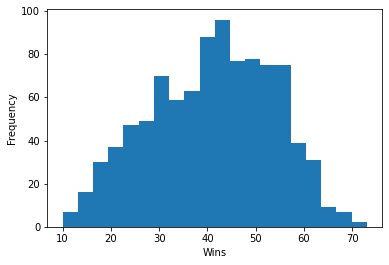

In [5]:
numBins = 20
plt.figure()
df['W'].plot(kind='hist',bins=numBins)
plt.xlabel('Wins')
plt.ylabel("Frequency")
plt.show()


Use the dataframe ```df``` to answer the following questions: 

In [6]:
df.isnull().values.sum()

0

 1. Does the dataset contain missing values? How many are missing in total? (Hint: Use the ```isnull().values``` method on the ```df``` dataframe.)

In [11]:
# Write the code here. Create the variables totalMissing, 
# and print it to the terminal

# -------------------


# -------------------
totalMissing = df.isnull()

print('There are {} total missing entries'.format(totalMissing))


There are      SeasonEnd   Team      W    PTS  oppPTS     FG    FGA     2P    2PA  \
0        False  False  False  False   False  False  False  False  False   
1        False  False  False  False   False  False  False  False  False   
2        False  False  False  False   False  False  False  False  False   
3        False  False  False  False   False  False  False  False  False   
4        False  False  False  False   False  False  False  False  False   
..         ...    ...    ...    ...     ...    ...    ...    ...    ...   
950      False  False  False  False   False  False  False  False  False   
951      False  False  False  False   False  False  False  False  False   
952      False  False  False  False   False  False  False  False  False   
953      False  False  False  False   False  False  False  False  False   
954      False  False  False  False   False  False  False  False  False   

        3P    3PA     FT    FTA    ORB    DRB    AST    STL    BLK    TOV  
0    False  F

 2. What is the average number of wins? 

In [28]:
# Write the code here. Create the variables meanWins, 
# and print it to the terminal

# Code between the dashed lines
# -------------------


# -------------------

print('The average number of wins is {}'.format(meanWins))

The average number of wins is 40.998952879581154


 3. Each team is scheduled to play 82 games, so you should expect the average number of wins to be 41. Have any games ever been canceled? If so, how many were canceled, and in it what seasons? Keep in mind that teams have always played 82 games a season, but the number of teams increased between 1980 and 2016.

In [7]:
# Write the code here. For each season create the variables gamesPlayed, 
# totalTeams, and canceledGames. Then if a game is canceled, print 
# the season and canceledGames to the terminal 

seasonSet = set(df['SeasonEnd'])
for season in seasonSet:
    
    gamesPlayed = df['W'][df['SeasonEnd']==season].sum()

    # -------------------


    # -------------------
    if canceledGames == 1:
        print('1 game was canceled in the {} season.'.format(season))
    elif canceledGames > 1:
        print('{} games were  canceled in the {} season.'.format(canceledGames, season))

# A. This is a neat result. We were able to track down why the data didn't fit our expectations.

1 game was canceled in the 2013 season.


4. Create a new feature in ```df``` defined as the difference between PTS and oppPTS. Call it ```diffPTS```.

In [36]:
# Write the code here. Add a column titled 'diffsPTS' to df with
# the appropriate values  

# -------------------


# -------------------

df.head()

,SeasonEnd,Team,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,diffPTS
0,2014,Philadelphia 76ers,19,8155,9012,3108,7150,2531,5303,577,1847,1362,1918,949,2556,1791,765,330,1384,-857
1,2004,Detroit Pistons,54,7388,6909,2747,6314,2414,5346,333,968,1561,2074,1014,2492,1702,659,570,1241,479
2,2004,San Antonio Spurs,57,7501,6909,2842,6434,2434,5294,408,1140,1409,2069,1029,2669,1676,661,537,1203,592
3,2004,Indiana Pacers,61,7493,7021,2753,6322,2304,5041,449,1281,1538,2014,965,2452,1774,726,411,1182,472
4,1997,Cleveland Cavaliers,42,7173,7022,2704,5972,2221,4688,483,1284,1282,1773,909,2159,1714,655,315,1188,151


5. Create a scatter plot of wins vs ```diffPTS```. Use the ```plot.scatter``` method on ```df``` . What do you see? Don't forget to label your axes. You can get help with this method by running ```help(pd.DataFrame({}).plot.scatter)``` in your terminal or a code block. Your plot should look like this: 

![title](img/scatterTest.png)


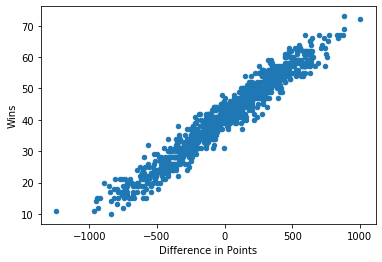

In [37]:
# Write the code here. Comment on what you see.


# -------------------

    
    
    
    
    
    

# -------------------



 6. Use the ```corr()``` method on df to determine the correlation coefficient between each feature and wins. Which feature is most (positively) correlated? Most (negatively) correlated? Most uncorrelated?

In [8]:
# Write the code here. Generate a vector of correlation coefficents between each feature,
# and the number of wins. Then print the names of the features with the highest and the lowest 
# correlation. 

# Make sure you drop features used to identify datapoints (e.g., team name and season end)
dfNoLabels = df.drop(columns=['Team','SeasonEnd'], axis=1)



# -------------------



# -------------------

print('{} had the highest positive correlation with wins and {} had the highest negative correlation.'.format(maxCorrFeat, maxNegCorrFeat))
print('{} had the smallest correlation with wins'.format(smallestCorrFeat))

DRB had the highest positive correlation with wins and oppPTS had the highest negative correlation.
STL had the smallest correlation with wins


## Simple linear regression

In this section, we will fit a simple linear regression model, i.e., a model with a single feature. The model will use ```diffPTS``` as the only feature to predict the number of wins. We will first approach the problem from an information extraction perspective. See Appendix A for a careful examination of the model assumptions with residual plots. Second, we will take a prediction accuracy approach and train a model using ten-fold cross validation. See Appendix B for more information on cross validation and partitioning the data into training and testing sets.

### Part I: Information extraction

We must first partition our data into training and testing sets. The training set will include all NBA seasons prior to 2011 and the testing set will include the most recent five seasons. The training set will be used to train our model and the accuracy will be determined on the held out test set. We can partition the data as follows:

In [0]:
dfTrain = df[df.SeasonEnd<2011]
dfTest = df[df.SeasonEnd>=2011]

We can check how many datapoints are in our training and testing set. In general, the training set has more datapoints than the testing set.

In [49]:
print('There are {} rows in the training set and {} rows in the testing set'.format(dfTrain.shape[0], dfTest.shape[0]))

There are 805 rows in the training set and 150 rows in the testing set


Now, use the ```LinearRegression```  function imported in the following code block. Fit the linear regression model using wins as the target and ```diffPTS``` as the feature. Store the model as ```mdlSimple```. Use the ```score``` method to calculated the R^2 value of the model, and use the approriate numpy functions to calculate the mean squared error.


In [50]:
from sklearn.linear_model import LinearRegression
# Parition training data
xTrain = dfTrain[['diffPTS']]
yTrain = dfTrain['W']

# Train model
mdlSimple = LinearRegression()
mdlSimple.fit(xTrain, yTrain)

# Predict the target with the training data
trainPred = mdlSimple.predict(xTrain)

# Evaluate model on target feature in training set
# Use the score method to calculate R^2
RSquared = mdlSimple.score(xTrain,yTrain) 

# Use the numpy functions method to calculate mse
error = trainPred - yTrain
mse = np.mean((error)**2)

print('The RSquared value is {} and the MSE is {}.'.format(RSquared,mse))

The RSquared value is 0.9422309310936211 and the MSE is 9.354139868085305.


In some cases, it is best to write a function to evaluate metrics. For example, in linear regression we often need to know the $p$-value of the coefficent, which are calculated with several steps that are outlined [here](https://stattrek.com/regression/slope-test.aspx). Since these steps are always the same we should write a function to return the p-values for a generic model ```mdl```, set of ```xValues```, and set of ```yValues```. We can write the function as follows:

In [53]:
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse_fun

def p_value_calc(mdl, xValues, yValues,printValues = 1):
    # The following function calculated the p values of each coeffcient 
    # from a trained model. 
    
    # get model parameters and prediction
    yPred = mdl.predict(xValues)
    params = np.append(mdl.intercept_,mdl.coef_)
    
    # Calculate the MSE using built in function
    MSE = mse_fun(y_pred=yPred,y_true=yValues)
    
    # Clear features (xValues) and join it to vector of ones (i.e., y-intercept feature)
    xValues = xValues.reset_index(drop=True)
    interceptOnes = pd.DataFrame({"Intercept":np.ones(len(xValues))})
    newX = interceptOnes.join(xValues)
   
    # Calculate variance and standard deviation of the regression coefficents
    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    
    # Calculate p values using the t-test
    tScores = params / sd_b
    degreesOfFreedom = len(xValues)-2
    pValues =[2*(1-stats.t.cdf(np.abs(tScore),degreesOfFreedom)) for tScore in tScores]
    
    # Print out the p values
    if printValues:
        print('The p-values for coefficent:')
        for idx, featName in enumerate(newX.columns):
            pVal = pValues[idx] 
            print('\t{} is {}'.format(featName,pVal))
        return
    # Alternatively, return p values as a dataframe with indicies that correspond to feature names
    else:
        pValues = pd.DataFrame({"pValue" : pValues},index=newX.columns)
        return pValues

# We can now use this funciton to evaluate pValues in any code blocks
# after this one. An example is:
p_value_calc(mdlSimple, xTrain, yTrain,printValues=1)

The p-values for coefficent:
	Intercept is 0.0
	diffPTS is 0.0


Since we will also peridocially evaluate the MSE and the R$^2$ value of the models throught this lab, it is a good idea to write the evaluation as a function. 

In [54]:
# Complete this function

def model_eval(mdl, xValues, yValues, printValues = 1):
    # This function will print out the R^2 and MSE to the terminal, or
    # return the MSE and R^2 values
   
    # -------------------
    

    # -------------------

    if printValues:
        print('The RSquared value is {} '.format(RSquared))
        print('The MSE is {} '.format(mse))
        return
    # Alternatively, return R^2 and MSE
    else:
        return RSquared, mse











    
    # -------------------

# As a sample, the below function should print of the MSE and RSquared value.
model_eval(mdlSimple, xTrain, yTrain, printValues = 1)

The RSquared value is 0.9422309310936211 
The MSE is 9.354139868085305 


Use the ```model_eval``` function that you just completed to obtain the prediction accuracy and $R^2$ on the testing set:

In [55]:
# Partition testing data
xTest = dfTest[['diffPTS']]
yTest = dfTest.W

# Predict target features for held out test set
model_eval(mdlSimple, xTest, yTest, printValues = 1)


The RSquared value is 0.9479304789786938 
The MSE is 8.81536759470621 


Remember that the accuracy of our interpretations depend on whether or not the model assumptions are satisfied. Appendix A provides instructions and code for checking each model assumption. Answer the following questions:

 1. Which regression coefficients are statistically significant at $p < 0.05$? What are their values?

In [0]:
p_value_calc(mdlSimple, xTrain, yTrain,printValues=1)
print("diffPTS coefficient is {}".format(mdlSimple.coef_[0]))
print("Intercept is {}".format(mdlSimple.intercept_))

The p-values for coefficent:
	Intercept is 0.0
	diffPTS is 0.0
diffPTS coefficient is 0.03256772791728775
Intercept is 41.0


Intercept and point differential: p=0


 2. By how much does a team need to increase their point differential to produce an additional win?

In [0]:
# Write the code here. Comment on what you see.
# -------------------


# -------------------
print('A team needs to increase their point differential by {} points'.format(pointdiff))




A team needs to increase their point differential by 31.0 points


 3. Suppose you manage the Toronto Raptors and your point differential from last year was 480. Assuming you will have a similar point differential this year, how many games do you expect to win?

In [10]:
# Write the code here. Comment on what you see.
# -------------------


# -------------------

print("Using the predict method, we expect the Toronto Raptors will win {} games.".format(np.round(method[0])))
print("Using the coefficents and intercept, we expect the Toronto Raptors will win {} games.".format(np.round(manual[0])))





NameError: name 'method' is not defined

### Prediction accuracy
To assess the prediction accuracy of our model, it is imperative that we test the model on observations that were not used to train the model. One way to do this is to partition the data into training and testing sets like we did above. However, a more rigorous approach is to use 10-fold cross validation. 10-fold cross validation partitions the data into ten equally sized sets. One of the sets is then used as a _testing set_ while the other nine are used as a _training set_. This process is repeated ten times (i.e., until each of the 10 sets has served as the _testing set_). More information can be found in Appendix B. Cross validation can be initialized as follows:

In [0]:
from sklearn.model_selection import KFold

# Get all x features and their corresponding y_hat targets for all data points
xAll = np.array(df[['diffPTS']])
yAll = np.array(df.W)

# KFold function will split the data
# setting the random_state to an integer ensures the same splits are made every time
kf = KFold(n_splits = 10,random_state=2,shuffle=True)

In general, random seeds or random states should be set in your code, so that any related results can be replicated. The command \texttt{disp(c)} displays summary information about the cross validation instance. The following code block can be used to run a 10-fold cross validation. However, you must first insert the ```LinearRegression``` function and the ```predict``` method as you did above.

In [0]:
# Complete this code block
# Initialize KFold lists
RSquared = [0] * 10 
MSE = [0] * 10


for idx, [train_index, test_index] in enumerate(kf.split(xAll)):
    # Parition data for each loop 
    xTrain = xAll[train_index]
    yTrain = yAll[train_index]
    xTest = xAll[test_index]
    yTest = yAll[test_index]
    # Train model
    mdlSimple = LinearRegression()
    mdlSimple.fit(xTrain,yTrain)

    # Write the code here.
    # Compute the MSE and R-Squared value for each fold
    
    # -------------------
    

    
    
    # -------------------

The R$^2$ and mean squared error values for each fold are stored in RSquared and MSE, respectively. Complete the following excercises:

 1. How many observations are in each test set?

In [0]:
# Write the code here. Print out the number of observations 
# from each fold of the cross validation to the terminal. 

# -------------------


    
# -------------------


In fold 0 there are 96 observations.
In fold 1 there are 96 observations.
In fold 2 there are 96 observations.
In fold 3 there are 96 observations.
In fold 4 there are 96 observations.
In fold 5 there are 95 observations.
In fold 6 there are 95 observations.
In fold 7 there are 95 observations.
In fold 8 there are 95 observations.
In fold 9 there are 95 observations.


 2. What is the average mean squared error across the 10 folds? What is the average R$^2$ value?


In [0]:
# Write the code here. Print out the avgMSE and avgRSquared value. 

# -------------------





# -------------------

print('Across the ten folds:\n the average MSE is {}\n the average R-squared is {}.'.format(avgMSE,avgRSquared))

Across the ten folds:
 the average MSE is 9.298011112298877
 the average R-squared is 0.9412487874517783.


 3. Create a figure with two boxplots that display the distribution of mean squared error and r-squared values. Use the function ```plt.boxplot```.

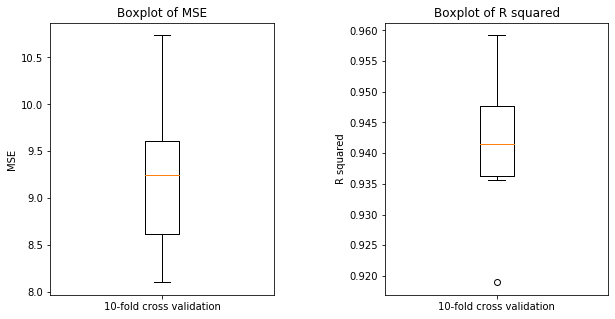

In [0]:
# Complete the code block 

plt.figure(figsize=(10,5))
matplotlib.pyplot.subplots_adjust(wspace = 0.5)

# First box plot here
ax=plt.subplot(121)

# Write the code here.  
# -------------------







# -------------------

# Second box plot here
ax=plt.subplot(122)
# Write the code here.  
# -------------------




# -------------------
plt.show()

## Multiple linear regression
In the previous section, we predicted the number of wins using point differential. We were computed ```diffPTS``` a priori because of previous work and domain specific knowledge. However, in many applications, you may not have this level of initial understanding. In this section, we will remove the ```diffPTS``` variable and use multiple linear regression (i.e., multiple features) to show that it is possible to achieve nearly the same level of prediction accuracy without any prior knowledge. Before we begin, remove ```diffPTS``` from ```df``` using the following code:

In [0]:

df = df.drop(labels=['diffPTS'], axis=1)
df.head()

,SeasonEnd,Team,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2014,Philadelphia 76ers,19,8155,9012,3108,7150,2531,5303,577,1847,1362,1918,949,2556,1791,765,330,1384
1,2004,Detroit Pistons,54,7388,6909,2747,6314,2414,5346,333,968,1561,2074,1014,2492,1702,659,570,1241
2,2004,San Antonio Spurs,57,7501,6909,2842,6434,2434,5294,408,1140,1409,2069,1029,2669,1676,661,537,1203
3,2004,Indiana Pacers,61,7493,7021,2753,6322,2304,5041,449,1281,1538,2014,965,2452,1774,726,411,1182
4,1997,Cleveland Cavaliers,42,7173,7022,2704,5972,2221,4688,483,1284,1282,1773,909,2159,1714,655,315,1188


### Part I: Manual feature selection
With no prior knowledge of the problem or domain, our first attempt may be to simply fit a model to all of the data. First, we must partition the data into training and testing sets:

In [0]:
dfTrain = df[df.SeasonEnd<2011]
dfTest = df[df.SeasonEnd>=2011]

Use the ```LinearRegression``` function to fit a linear regression model, and predict the wins using all 17 features (we omit Team and Season End because those are labels for the data) for both the train and test sets. Store the model output as ```mdlAll``` and calculate the MSE and R$^2$ value of both the train and test sets.

In [0]:
# Complete this code block. 

# Parition training data
xTrain = dfTrain.drop(labels=['W','Team','SeasonEnd'], axis=1)
yTrain = dfTrain.W

# Train model
mdlMultiNaive = LinearRegression()
mdlMultiNaive.fit(xTrain, yTrain)

# Evaluate model on target feature in training set
print('Training set evaluation:')

# Write the code here.  
# -------------------



# -------------------


# Evaluate model on target feature in training set
print('\nTesting set evaluation:')

# Write the code here.  
# -------------------




# -------------------

Training set evaluation:
The RSquared value is 0.9436652993971302 
The MSE is 9.12188267600359 
The p-values for coefficent:
	Intercept is 0.0
	PTS is 0.9999931568007923
	oppPTS is 0.0
	FG is nan
	FGA is nan
	2P is nan
	2PA is nan
	3P is 0.9999996656399348
	3PA is nan
	FT is 0.999998484317657
	FTA is 0.6812971650122084
	ORB is 0.24711667662586634
	DRB is 0.03523857013423681
	AST is 0.2748029070851721
	STL is 0.5330872148947641
	BLK is 0.010902832754961844
	TOV is 0.17006308503813905

Testing set evaluation:
The RSquared value is 0.9041400553119117 
The MSE is 16.22908437525138 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


Answer the follow questions:

 1. Did you receive a warning message?

 2. Compare the difference between MSE of the train and test target predictions. What happened?

Highly correlated features can cause problems for predictive models. To remedy this issue, we must identify which features have a correlation coefficient that is greater than $0.85$ or less than $-0.85$ (i.e., highly correlated). We should try to remove the fewest number of features possible. We can use the following code to identify and remove the highly correlated features

In [0]:
# Create a new dataframe to "Trim" away correlated features
xTrainTrim = xTrain[:] # [:] gets the values of the pointer rather than the address
xTestTrim =xTest[:]
corrCoeffVector = xTrainTrim.corr()
highCorrFeats = (corrCoeffVector.abs()>=0.85).sum()
# Loop through the maximum number of correlated features in dfXTrainTrim
# >1 because each feature is highly correlated with itself
while highCorrFeats.max() > 1:
    highestCorrFeat = highCorrFeats.idxmax()
    xTrainTrim = xTrainTrim.drop(labels=[highestCorrFeat], axis=1)
    xTestTrim = xTestTrim.drop(labels=[highestCorrFeat], axis=1)
    print('removed {}'.format(highestCorrFeat))
    corrCoeffVector = xTrainTrim.corr()
    highCorrFeats = (corrCoeffVector.abs()>=0.85).sum()

removed 2PA
removed FG
removed 2P
removed 3P
removed FT


Now, use the ```Linear Regression``` function to fit a model to all remaining features and display summary information for the training and test splits.

In [0]:
# Complete this code block. 

# Train model
mdlMulti = LinearRegression()
mdlMulti.fit(xTrainTrim, yTrain)



# Evaluate model on target feature in training set
print('Training set evaluation:')

# Write the code here.  
# -------------------



# -------------------


# Evaluate model on target feature in testing set
print('\nTesting set evaluation:')

# Write the code here.  
# -------------------




# -------------------


Training set evaluation:
The RSquared value is 0.9435574738334954 
The MSE is 9.139342112734841 
The p-values for coefficent:
	Intercept is 0.0
	PTS is 0.0
	oppPTS is 0.0
	FGA is 0.1110944972016854
	3PA is 0.9371858210975361
	FTA is 0.31967066098368035
	ORB is 0.18943449991030636
	DRB is 0.02152835211327564
	AST is 0.22773916287758889
	STL is 0.4062868155435506
	BLK is 0.01022128065541672
	TOV is 0.15045667757720516

Testing set evaluation:
The RSquared value is 0.8971093069899835 
The MSE is 17.419389753676082 


Answer the following questions:

 1. Which variables are statistically significant at $p<0.05$?

In [0]:
# Write the code here. 
# -------------------




# -------------------

Intercept 0.0
PTS 0.0
oppPTS 0.0
DRB 0.02152835211327564
BLK 0.01022128065541672


 2. What are the values of the regression coefficients? How would you interpret these values (e.g., how many ```PTS``` are needed to produce one more win)? With this interpreation, are any coefficent-feature pairs that are suprising? 


In [0]:
# Write the code here. Comment on what you see.
# -------------------




# -------------------


PTS          31.243363
oppPTS      -32.242549
FGA        -506.017542
3PA      -31927.329944
FTA       -1051.762307
ORB         440.284632
DRB         308.722225
AST         922.577591
STL         625.244169
BLK         268.712409
TOV        -514.300948
dtype: float64


 3. What is the R$^2$? What is the mean squared error? How do the test and training set results compare? How do these results compare to the simple linear regression?

In [0]:
# Write the code here. Comment on what you see.

# -------------------




# -------------------


The RSquared value is 0.8971093069899835 
The MSE is 17.419389753676082 
The RSquared value is 0.9435574738334954 
The MSE is 9.139342112734841 


### Part II: Lasso regularization
Lasso regularization is one of the most widely used methods in regression and machine learning. In this section, we will use the lasso as an automated method for feature selection. First, we train a lasso model using 10-fold cross validation to estimate the mean squared error. Earlier in this lab we made the ten folds for our cross validation using the functions from ```sklearn.model_selection.KFold```, however, many functions in sklearn have a cross validation method (e.g., ```LassoCV```).



In [0]:
# Fit a LASSO model and use 10-fold CV to estimate MSE
from sklearn.linear_model import LassoCV

mdlLasso = LassoCV(eps = 0.01, n_alphas=100, cv=10, random_state=2)
mdlLasso.fit(xTrainTrim, yTrain)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.01, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=2, selection='cyclic',
        tol=0.0001, verbose=False)

Note that sklearn refers to $\lambda$ as _alpha_. Answer the following questions:

1. What is the optimal $\lambda$?

In [0]:
# Write the code here.
# -------------------



# -------------------


24.441155279503114


2. Which features were chosen? What are the regression coefficients for those features? How do these coefficents compare with the multiple linear regression above?

In [0]:
# Write the code here. Comment on what you see.
# -------------------





# -------------------


PTS       0.031980
oppPTS   -0.032015
FGA      -0.000000
3PA       0.000000
FTA       0.000000
ORB      -0.000000
DRB       0.001230
AST       0.000120
STL      -0.000000
BLK       0.000203
TOV      -0.000000
dtype: float64


3. Which variables are statistically significant at $p<0.05$? Based on the results from the simple linear regression (i.e., with only ```diffPTS```) is the suprising?

In [0]:
# Write the code here. Comment on what you see.
# -------------------





# -------------------

The p-values for coefficent:
	Intercept is 0.0
	PTS is 0.0
	oppPTS is 0.0
	FGA is 1.0
	3PA is 1.0
	FTA is 1.0
	ORB is 1.0
	DRB is 0.38614575502407966
	AST is 0.8944720616326487
	STL is 1.0
	BLK is 0.8891773668766727
	TOV is 1.0


4. What is the mean squared error? How does that compare with the results from both the simple and multiple linear regression?

In [0]:
# Write the code here. Comment on what you see.
# -------------------




# -------------------

The RSquared value is 0.9425886187293218 
The MSE is 9.29622201971476 


# Appendix
The following code block will clear your workspace, load the data, and import the base packages required for to run the experiments in the Appendix.

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Parition training data
df = pd.read_csv('NBA_data.csv')
dfTrain = df[df.SeasonEnd<2011]
xTrain = dfTrain.drop(labels=['W','Team','SeasonEnd'], axis=1)
yTrain = dfTrain.W


## Appendix A: Model assumptions
The basic assumptions for linear regression are as follows:


 - __Weak exogeneity:__ The feature values are known exactly and not subject to error. This must be assumed by the modeler.
 - __Linearity:__ The target can be written as a linear combination of features.
 - __Constant variance or homoscedasticity:__ The variance of the error terms is constant across all samples.
 - __No autocorrelation:__ The error terms are not correlated with each other. Note that this assumption is satisfied if the targets are assumed to be from independent samples.
 - __Normality (or other distribution information):__ The error terms can, but are not required, to be normally distributed. If they are, the the regression coefficients are also normally distributed. This assumption impacts the statistical tests used for the regression coefficients and other distributional assumptions are possible.


Before interpreting the model ```mdlSimple``` in Part I, we should carefully check the model assumptions. Residual (or error) plots can be used to test for linearity, homoscedasticity, autocorrelation, and normality. Residuals can also be adjusted or standardized to test for outliers. A residual is defined as $r_i=(\hat{y}_i -y_i)$.

### Normality
We can check if the residuals are normally distributed using a histogram and a QQ-plot. The histogram should appear symmetric and be centered at zero. The QQ-plot should have all values near the dashed line. Some variability is normal in the tails, but it should not be severe or pathogenic. The following code can be used to generate these plots.

In [0]:
from scipy import stats
mdlMultiNaive = LinearRegression()
mdlMultiNaive.fit(xTrain, yTrain)
yPred = np.array(mdlMultiNaive.predict(xTrain))
yHat = np.array(yTrain.astype(object))

yResiduals = yHat-yPred

k2, p = stats.normaltest(yResiduals)
alpha = 0.05
print("p = {}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected (i.e. data is not normal)")
else:
    print("The null hypothesis cannot be rejected (i.e., data is normal)")

p = 0.29735867211484407
The null hypothesis cannot be rejected (i.e., data is normal)


### Homoscedasticity and autocorrelation
We can check for homoscedasticity and autocorrelation using three different residual plots: i) residuals vs. predicted targets, ii) residual vs. previous residual, and iii) residuals vs. case order. In each plot, any patterns or an obvious non-random scatter indicates that there may be a violation and requires further investigation. The following code can be used to generate these plots.

<Figure size 432x288 with 0 Axes>

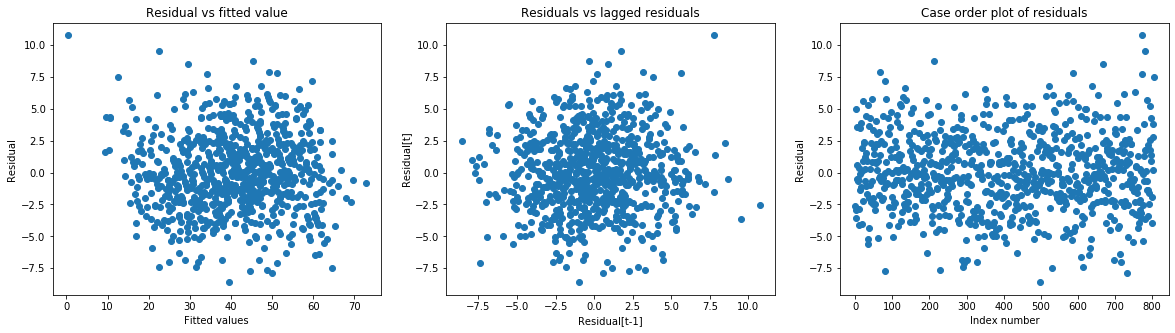

In [0]:
# Check for autocorrelation and homoscedasticity
matplotlib.pyplot.subplots_adjust(wspace = 0.2,hspace = 1)
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(yPred,yResiduals)
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual vs fitted value')


plt.subplot(132)
plt.scatter(yResiduals[:-1],yResiduals[1:])
plt.ylabel('Residual[t]')
plt.xlabel('Residual[t-1]')
plt.title('Residuals vs lagged residuals')

plt.subplot(133)
indexVals = list(range(len(yResiduals)))
plt.scatter(indexVals, yResiduals)
plt.ylabel('Residual')
plt.xlabel('Index number')
plt.title('Case order plot of residuals')

plt.show()

### Outliers
We can check for outliers using standardized residuals or metrics derived from the residuals. There are two commonly used metrics for assessing outliers: i. Leverage and ii. Cook's distance. In each plot, large or outlying values may indicate an outlier. The following code can be used to generate these plots.

In [0]:
# Imports #
import statsmodels.api as smapi

# Fit a new linear regression using the ols function 
smMultiNaive = smapi.OLS(yTrain, smapi.add_constant(xTrain)).fit()

# Calculate cook's distance of all points
influence = smMultiNaive.get_influence()
(cookDist, pCook) = influence.cooks_distance

# Find max Cook's distance 
maxCookDistArg = cookDist.argmax()
print('The highest Cook\'s distance was {} at index {}.'.format(cookDist[maxCookDistArg],maxCookDistArg))
print('Using Cook\'s distance, there are {} outliers.'.format((pCook<0.05).sum()))

The highest Cook's distance was 0.02955211964083939 at index 804.
Using Cook's distance, there are 0 outliers.


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


It appears there are no outliers in our training set. In some cases, significant outliers may need to be removed from the data to avoid biasing the results. 

## Appendix B: Training, testing, and cross validation

### Training and testing

To assess out-of-sample model performance, we typically partition our data into a training and testing set. The _training set_ is the data set that is used to identify the relationship between the feature variables and the target. As such, we sometimes refer to the model fitting process as _training the model_. The _testing set_ is set aside during the model fitting process and used to evaluate performance once a final model has been chosen.

If we do not use a testing set and simply evaluate the model performance on the training set, this can lead to a phenomenon known as _overfitting_. Overfitting occurs when the model identifies relationships that are unique to the training set and do not generalize for the larger population. In both information extraction and prediction accuracy applications, it is important that our results generalize beyond the training data. In other words, we want to be confident that our model applies to the general population that the training set was sampled from.

In some instances, we may want to partition our data into three sets: training, validation, and testing. The _validation set_ is used to choose or tune user-specified parameters in the model, which are commonly referred to as _hyperparameters_. For example, we can use a validation set to determine the optimal value of $\lambda$ when using a regularization term. We accomplish this by training the model on the training set with a specified $\lambda$. We then test the model performance on the validation set. We repeat this process for many values of $\lambda$ and choose the $\lambda$ corresponding to the best model performance. Once our hyperparameter(s) are chosen, we apply the final model to the testing set to evaluate the out of sample performance.

There are many way to partition the data into training and testing sets. For small data sets ($<100$ observations), cross validation should be used to reduce the variance in the estimates (see the next section). If the data set is sufficiently large, then it is common to use between $70-90\%$ of the data for training and $10-30\%$ of the data for testing.

### Cross validation
In prediction accuracy applications, especially with small data sets, different training/testing partitions can yield significantly different estimations of model accuracy. In this lab, the $R^2$ values obtained from cross validation are actually quite stable, ranging from $0.91$ to $0.95$. For small data sets, cross validation is a popular approach that can be used to reduce the variance and obtain more stable estimates of accuracy (e.g., MSE or $R^2$). In K-fold cross validation, the data is partitioned into K equally sized samples. A single sample is used for testing and the remaining K-1 samples are used for training. This process is repeated K times, with each of the K samples used exactly once as the test set. The K results can then be averaged to produce a single estimate or displayed graphically (as we did above). 10-fold cross validation is commonly used, but any value of K can be chosen.

In repeated K-fold cross validation, the process of K-fold cross validation is repeated many times using different initial partitions of the data. Repeated cross validation is considered the gold standard for estimating model performance because it reduces both the bias and the variance of the estimations. However, depending on the application, it may require signifiant computational resources.

In stratified K-fold cross validation, the data is partitioned so that each fold has roughly the same mean response variable (or the same proportion of classes). In the binary case, this means that each fold has roughly the same number of 1s and 0s. This is commonly used for classification problems where the data set has many more of one outcome.

